# Solving TSP for benchmarking 

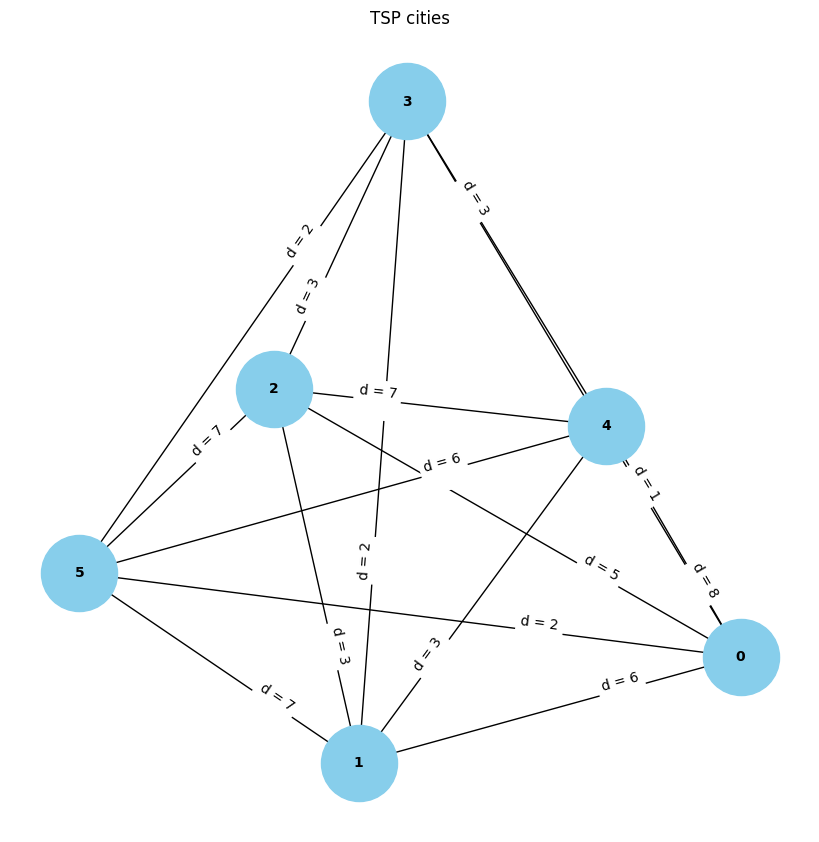

array([[0, 6, 5, 1, 8, 2],
       [6, 0, 3, 2, 3, 7],
       [5, 3, 0, 3, 7, 7],
       [1, 2, 3, 0, 3, 2],
       [8, 3, 7, 3, 0, 6],
       [2, 7, 7, 2, 6, 0]])

In [8]:
from amplify import solve

from TSP.model import Tsp

n = 6

tsp = Tsp(n, solver="Amplify", seed=123, draw=True)

qubo = tsp.qubo(penalty=1_000_000)
model = qubo["model"]

tsp.matrix


## Brute Force

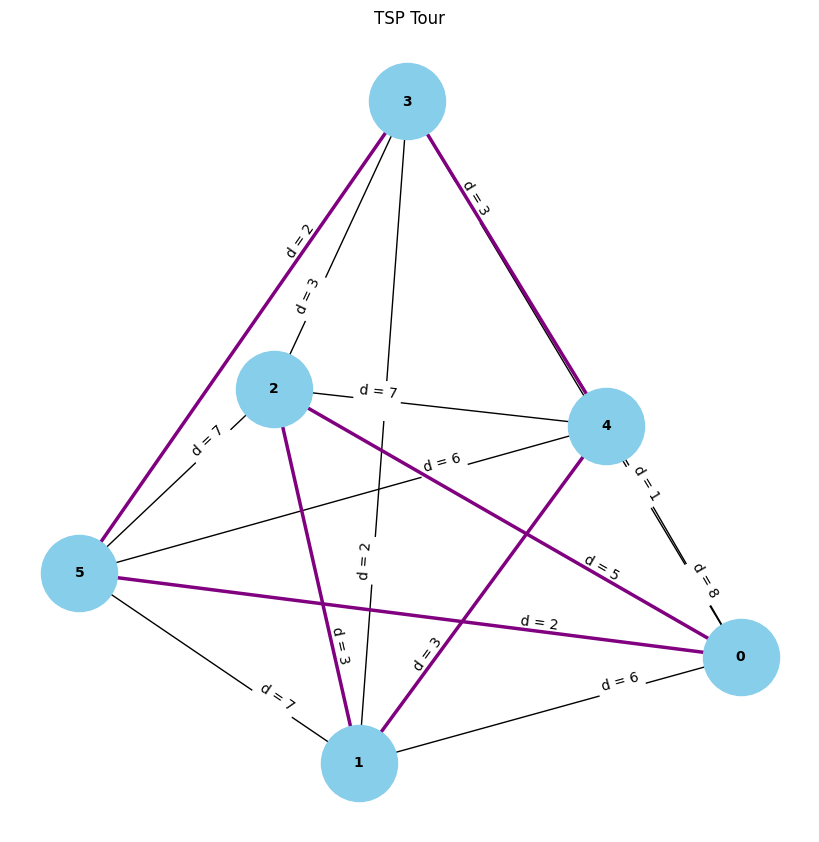

Cost: 18, Tour: (0, 2, 1, 4, 3, 5)


In [ ]:
from TSP.core import bruteforce


tour, cost = bruteforce(tsp.matrix)

tsp.draw_tour(tour)
print(f"Cost: {cost}, Tour: {tour}")

## Fixstars Amplify AE

In [6]:
# Initialise Fixstars Client
from Utils.solvers import GetFixstarsClient

clientFS = GetFixstarsClient()

# Solve set partitioning and view result
resultF = solve(model, clientFS)

tsp.interpret(resultF)

([3, 0, 5, 4, 1, 2], 18.0, 0.058937)

## Gurobi

In [4]:
from Utils.solvers import GetGurobiClient

# for window with conda env
clientG = GetGurobiClient(r"D:\miniconda3\envs\cwq\gurobi110.dll")
resultG = solve(model, clientG)

tsp.interpret(resultG)

([2, 1, 4, 5, 0, 3], 18.0, 0.013524)

## D-Wave

In [5]:
# from Utils.solvers import GetDWaveClient

# clientDWave = GetDWaveClient()
# clientDWave.parameters.num_reads = 3_000
# result = solve(model, clientDWave)
# 
# tsp.interpret(result)
